In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('../../data/processed/gee_ds_20231003_formatted/mapped_paths.csv')
df.head()

,no2_path,features_path,date,ds_type
0,../../data/processed/gee_ds_20231003_formatted...,../../data/processed/gee_ds_20231003_formatted...,2021-11-14,val
1,../../data/processed/gee_ds_20231003_formatted...,../../data/processed/gee_ds_20231003_formatted...,2019-01-28,test
2,../../data/processed/gee_ds_20231003_formatted...,../../data/processed/gee_ds_20231003_formatted...,2023-04-13,train
3,../../data/processed/gee_ds_20231003_formatted...,../../data/processed/gee_ds_20231003_formatted...,2019-02-01,train
4,../../data/processed/gee_ds_20231003_formatted...,../../data/processed/gee_ds_20231003_formatted...,2019-02-05,train


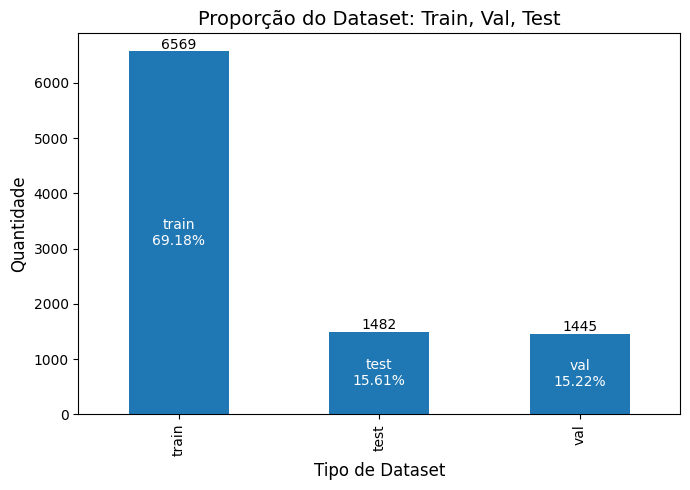

In [10]:
count_by_ds_type = df['ds_type'].value_counts()
total_samples = len(df)

# Proporção de cada dataset em relação ao total
proportions = count_by_ds_type / total_samples

# Criando o gráfico de barras
plt.figure(figsize=(7, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax = count_by_ds_type.plot(kind='bar', color=['#1f77b4'], width=0.5)

# Adicionando rótulos e título
plt.xlabel('Tipo de Dataset', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.title('Proporção do Dataset: Train, Val, Test', fontsize=14)

# Adicionando os valores acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionando a legenda com as proporções dentro do barplot
for i, ds_type in enumerate(count_by_ds_type.index):
    x = i  # Posição do dataset no eixo x
    y = count_by_ds_type[ds_type] / 2  # Altura para posicionar o texto
    proportion = proportions[ds_type]
    plt.text(x, y, f'{ds_type}\n{proportion:.2%}', ha='center', va='center', fontsize=10, color='white')

# Estilizando os ticks e adicionando grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('ds_div.pdf', bbox_inches='tight')
plt.show()
